# Elliptical Orbital Motion

```
Author:
    Zach Wolpe
    zachcolinwolpe@gmail.com
    www.zachwolpe.com
```

An elegant geometric trick that produces a __PERFECT ELLIPSE__.


If we:
 - generate a random point in a circle
 - draw µ straight lines from the point to the edge of the circle
 - locate the lines midpoints and rotate each line $90˚$ - leaving only the perpendicular counterparts an ellipse with emerge

This is part of a facinating physics proof showing why planets orbit in a perfectly elliptical manner. Relevance to physics:

https://www.youtube.com/watch?v=xdIjYBtnvZU

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import random
import math

# Generate Space

Generate a circle with diameter $d$ and radius $r$. using:

$$x_i = r * \cos(\theta)$$
$$y_i = r * \sin(\theta)$$

for $\theta$ is a sequence generated by $2\pi$

### ALGORITHM
 - set diameter
 - generate $\theta$
 - compute $x$ and $y$ independently 

In [2]:
# Set Diameter
d = 1000.0

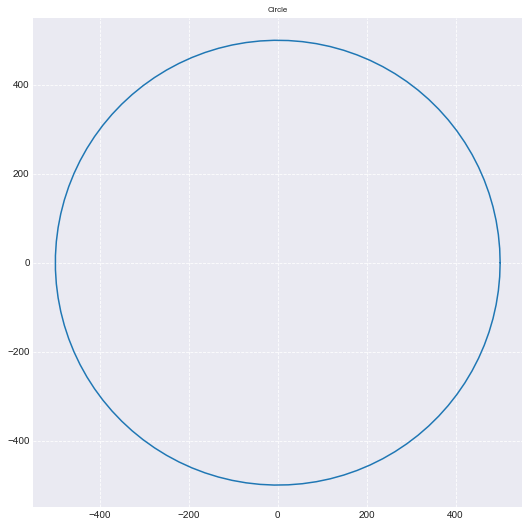

In [3]:
theta = np.linspace(0, 2*np.pi, 100)

r = d/2

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1, figsize=(9,9))



ax.plot(x1, x2)
ax.set_aspect(1)

#plt.xlim(-1.25,1.25)
#plt.ylim(-1.25,1.25)
plt.grid(linestyle='--')
plt.title('Circle', fontsize=8)
plt.savefig("plot_circle_matplotlib_01.png", bbox_inches='tight')

# Eccentric Point: ø

Randomly place a location in the the generated domain space - within the cicle.


### ALGORITHM
 - use radius and center, as this captures all _information_ about the circle
 - generate random _angle_ 
 - randomly generate radius that is defined as smaller than the true radius
 - compute $x$ and $y$ independently as points that intercept this new radius 

In [4]:
# all points on the circle
xy = np.concatenate(([x1],[x2]), axis=0).T

# Elliptical Point: Select Random Point in circle - NOT at the origin
def random_point(center, radius):
    """
    Return a random point in a circle
    """
    center_x = center[0]
    center_y = center[1]
    
    # random angle
    alpha = 2 * np.pi * random.random()
    
    # random radius
    ra = radius * np.sqrt(random.random())
    
    # calculate coordinates
    x_random = ra * np.cos(alpha) + center_x
    y_random = ra * np.sin(alpha) + center_y
    
    return (x_random, y_random)

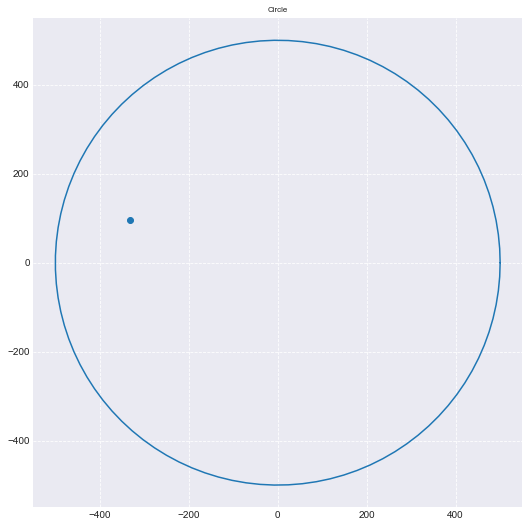

In [10]:
ran = random_point([0,0], r)

fig, ax = plt.subplots(1, figsize=(9,9))
ax.plot(x1, x2)
ax.scatter(*ran)
ax.set_aspect(1)

#plt.xlim(-1.25,1.25)
#plt.ylim(-1.25,1.25)
plt.grid(linestyle='--')
plt.title('Circle', fontsize=8)
plt.savefig("plot_circle_matplotlib_01.png", bbox_inches='tight')

circle = np.array((ran, x1, x2))

# Generate µ External Lines from ø

Compute µ evenly spaced lines from the eccentric point to the circle diameter by finding the point at which the functions equate.

Compute the gradients of the lines, store their function form $y_i = m_i*x_i + c_i$ in matrices $$\mathbb{Y = M*X + C}$$

### ALGORITHM
 - compute step-size = $360˚/µ$ such that lines are evenly spaced
 - for i in µ
  - use current angle $\alpha$ (initialized at $0$) to compute gradient ($m$) of the line
  - compute $c$ in $y = mx + c$ using $m$ and ø
  - set line equation to circle equation to finx endpoint
  - update angle $\alpha = \alpha + \text{stepsize} $ 

In [11]:
def lines_from_eccentric_point(circle, r, µ=100):
    """
    Return:
        lines from eccentric point
        
    Parameters:
        µ: number of lines
        circle
        radius
    """
    
    # Random Lines given a point 
    eccentric = circle[0]
    µ = µ/2

    lines = []
    angle = 0 # on X axis
    for i in range(int(µ)):
        step = 360 / µ
    

        # compute slope
        m = np.tan(np.degrees(angle))
        # solve for c
        c = eccentric[1] - m*eccentric[0]

        # compute location on circle
        # y=mx + c  == sin(x)=cos(x)
        yy = r*np.sin(angle)
        xx = r*np.cos(angle)

        # record line
        lines.append([m,c,xx,yy])
        # update angle
        angle = angle + step

    return lines

        
lines = lines_from_eccentric_point(circle=circle, r=r) 

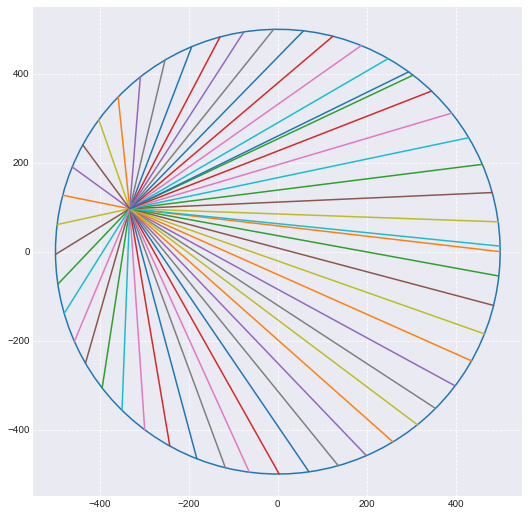

In [12]:
fig, ax = plt.subplots(1, figsize=(9,9))
plt.grid(linestyle='--')
ax.set_aspect(1)

ax.scatter(circle[0][0], circle[0][1], c='black')
ax.plot(circle[1], circle[2])

for i in range(len(lines)):
    ax.scatter(circle[0][0], circle[0][1], c='black')
    ax.plot([np.array(lines)[:,2][i],circle[0][0]], [np.array(lines)[:,3][i],circle[0][1]], '-', alpha=1)

plt.show()

# Rotate Lines 90˚

Rotate the lines $90˚$ and see a **PERFECT ELLIPSE** emerge!

### ALGORITHM
 - for each line
     - extract line equation
     - compute the gradients
     - locate midpoint
     - compute the new lines gradient:
      - the product of the gradients of perpendicular lines is $-1$ thus $m_1 * m_2 = -1$ and thus the new gradient is $m_2 = \frac{-1}{m_1}$
     - use midpoint and new gradient to compute new line equation
    

In [13]:
# Compute LINES gradient
line_gradients = []
for i in range(len(lines)):
    ml = (np.array(lines)[:,3][i] - circle[0][1]) / (np.array(lines)[:,2][i] - circle[0][0])
  #  cl = np.array(lines)[:,2][i] - ml*np.array(lines)[:,3][i]
    line_gradients.append(ml)
    
    
def rotate_lines_90(lines, line_gradients, circle):
    
    x_eccentric = circle[0][0]
    y_eccentric = circle[0][1]

    new_lines = []
    for i in range(len(lines)):
        
        # compute midpoint
        mid_x = (x_eccentric + lines[i][2])/2
        mid_y = (y_eccentric + lines[i][3])/2
        
        # perpendicular slope
        if line_gradients[i] == 0:
            mp = 0
        else:
            mp = -1/line_gradients[i]
        
        # calculate C = y - mx 
        cp = mid_y - mp*mid_x
        
    
        new_lines.append([mp,cp,mid_x, mid_y])
        
    return new_lines
    
new_lines = rotate_lines_90(lines, line_gradients, circle)

In [15]:
## generate data with equations
yzz = []
xzz = []
for i in range(len(new_lines)):
    xz = np.linspace(np.array(new_lines)[i][2]-250, np.array(new_lines)[i][2]+250, 100)
    xzz.append(xz)
    yz = []
    for j in xz:
        yz.append(np.array(new_lines)[i][0]*j + np.array(new_lines)[i][1])
    yzz.append(yz)
    

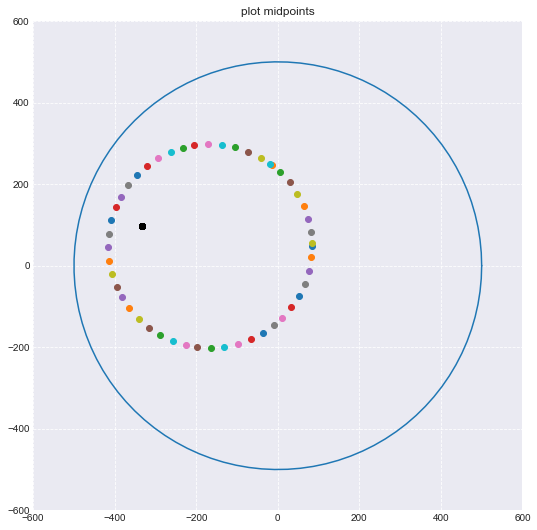

In [16]:
fig, ax = plt.subplots(1, figsize=(9,9))
plt.grid(linestyle='--')
plt.xlim(-600,600)
plt.ylim(-600,600)
ax.set_aspect(1)

ax.scatter(circle[0][0], circle[0][1], c='black')
ax.plot(circle[1], circle[2])


for i in range(len(yzz)):
    ax.scatter(circle[0][0], circle[0][1], c='black')
    ax.scatter(new_lines[i][2],new_lines[i][3])


plt.title('plot midpoints')
plt.show()

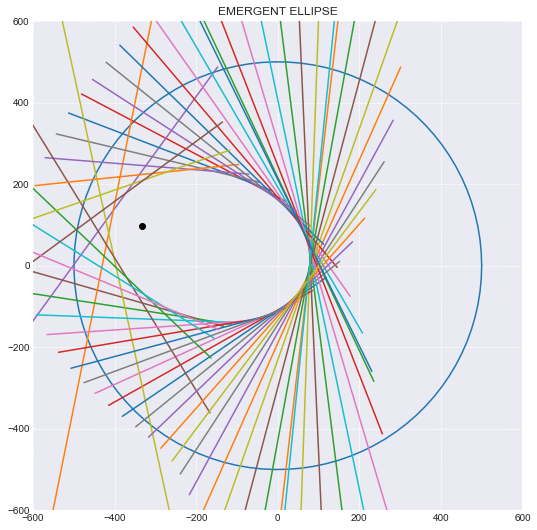

In [17]:
fig, ax = plt.subplots(1, figsize=(9,9))
plt.grid(linestyle='--')
plt.xlim(-600,600)
plt.ylim(-600,600)
ax.set_aspect(1)

ax.scatter(circle[0][0], circle[0][1], c='black')
ax.plot(circle[1], circle[2])


for i in range(np.shape(xzz)[0]):
    ax.plot(xzz[i], yzz[i])
   



plt.title('EMERGENT ELLIPSE')
plt.show()

# Single Function

For brevity, put into 1 function

In [304]:
def ellipse_magic(µ, d=1000):
    theta = np.linspace(0, 2*np.pi, 100)
    r = d/2
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)

    
    # all points on the circle
    xy = np.concatenate(([x1],[x2]), axis=0).T
    # Elliptical Point: Select Random Point in circle - NOT at the origin
    def random_point(center, radius):
        """
        Return a random point in a circle
        """
        center_x = center[0]
        center_y = center[1]
        # random angle
        alpha = 2 * np.pi * random.random()
        # random radius
        ra = radius * np.sqrt(random.random())
        # calculate coordinates
        x_random = ra * np.cos(alpha) + center_x
        y_random = ra * np.sin(alpha) + center_y
        return (x_random, y_random)
    
    ran = random_point([0,0], r)
    circle = np.array((ran, x1, x2))
    
    
    def lines_from_eccentric_point(circle, r, µ=100):
        """
        Return:
            lines from eccentric point

        Parameters:
            µ: number of lines
            circle
            radius
        """

        # Random Lines given a point 
        eccentric = circle[0]
        µ = µ/2
        lines = []
        angle = 0 # on X axis
        for i in range(int(µ)):
            step = 360 / µ
            m = np.tan(np.degrees(angle))
            c = eccentric[1] - m*eccentric[0]
            yy = r*np.sin(angle)
            xx = r*np.cos(angle)
            lines.append([m,c,xx,yy])
            angle = angle + step
        return lines
    lines = lines_from_eccentric_point(circle=circle, r=r, µ=µ) 
    
    
    # Compute LINES gradient
    line_gradients = []
    for i in range(len(lines)):
        ml = (np.array(lines)[:,3][i] - circle[0][1]) / (np.array(lines)[:,2][i] - circle[0][0])
      #  cl = np.array(lines)[:,2][i] - ml*np.array(lines)[:,3][i]
        line_gradients.append(ml)


    def rotate_lines_90(lines, line_gradients, circle):

        x_eccentric = circle[0][0]
        y_eccentric = circle[0][1]

        new_lines = []
        for i in range(len(lines)):
            # compute midpoint
            mid_x = (x_eccentric + lines[i][2])/2
            mid_y = (y_eccentric + lines[i][3])/2
            # perpendicular slope
            if line_gradients[i] == 0:
                mp = 0
            else:
                mp = -1/line_gradients[i]
            # calculate C = y - mx 
            cp = mid_y - mp*mid_x
            new_lines.append([mp,cp,mid_x, mid_y])

        return new_lines

    new_lines = rotate_lines_90(lines, line_gradients, circle)
    
    
    ## generate data with equations
    yzz = []
    xzz = []
    for i in range(len(new_lines)):
        xz = np.linspace(np.array(new_lines)[i][2]-250, np.array(new_lines)[i][2]+250, 100)
        xzz.append(xz)
        yz = []
        for j in xz:
            yz.append(np.array(new_lines)[i][0]*j + np.array(new_lines)[i][1])
        yzz.append(yz)
        
    fig, ax = plt.subplots(1, figsize=(12,12))
    plt.grid(linestyle='--')
    plt.xlim(-600,600)
    plt.ylim(-600,600)
    ax.set_aspect(1)

    ax.scatter(circle[0][0], circle[0][1], c='black')
    ax.plot(circle[1], circle[2])


    for i in range(np.shape(xzz)[0]):
        ax.plot(xzz[i], yzz[i])




    plt.title('EMERGENT ELLIPSE')
    plt.show()

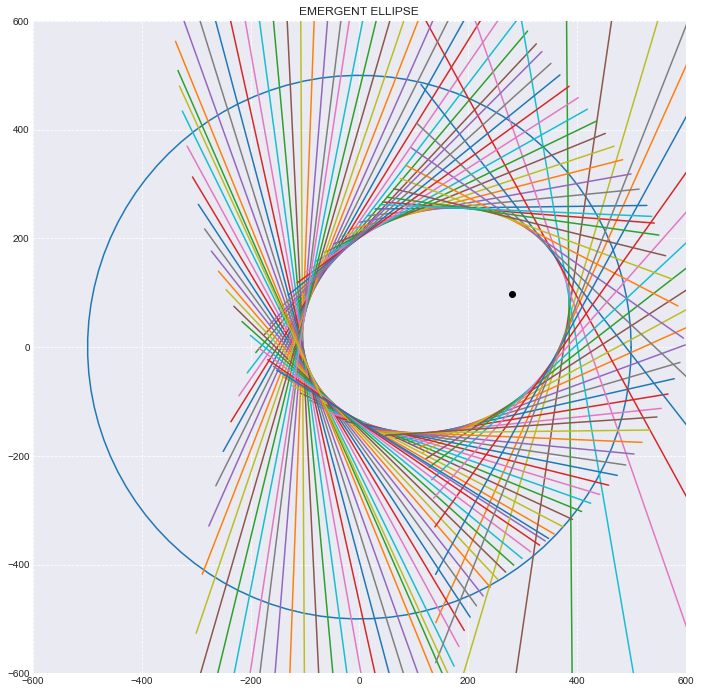

In [324]:
ellipse_magic(200)

# Thanks for Reading!

How cool is that!

Just for fun, here are so more patterns & some equations used.

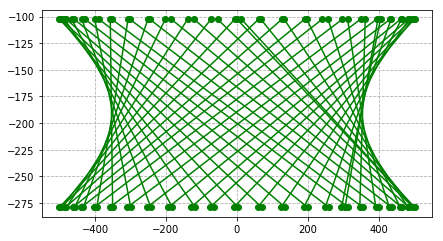

In [13]:
fig, ax = plt.subplots(1, figsize=(7,7))
plt.grid(linestyle='--')
ax.set_aspect(3)


for i in range(len(lines)):
    ax.plot([np.array(lines)[:,2][i],np.array(lines)[:,3][i]], [circle[0][0],circle[0][1]], 'go-')
    # plt.plot(x[i:i+2], y[i:i+2], 'ro-')

    
plt.show()

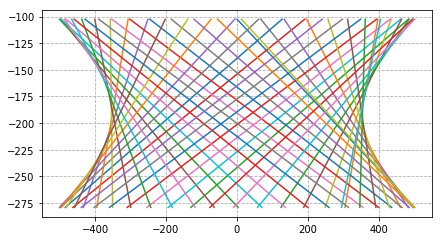

In [14]:
fig, ax = plt.subplots(1, figsize=(7,7))
plt.grid(linestyle='--')
ax.set_aspect(3)
ax.plot([np.array(lines)[:,2], np.array(lines)[:,3]],circle[0]);

# Equations: 

$$ \sin(\theta) = \cos(\theta) $$

$$ \frac{\sin(\theta)}{\cos(\theta)} = \frac{\cos(\theta)}{\cos(\theta)} $$

$$ \tan(\theta) = 1 $$

$$ \theta = \frac{\pi}{4} + (\pi n)$$

## Vertical Line

#### Circle Equation
$$\sin(\theta) = \cos(\theta) $$

#### Horizontal line
$$ x = xe $$

$$\therefore \sin(\theta) = xe $$
$$\therefore \theta = \arcsin(xe) $$

## Solve for X and Y in Circle

$$x = r*\cos(\theta)$$
$$y = r*\sin(\theta)$$



## Midpoint of lines
$$\left( \dfrac{x_1+x_2}{2} , \dfrac{y_1+y_2}{2} \right) $$

## Perpendicular Slope
$$m_p = \frac{-1}{m}$$

## Distance
$$d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$$

## Pythagoras
$$a^2+b^2=c^2 \implies (y_1 - y_2)^2 + (x_1 - x_2)^2 = distance$$
